## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata_df,study_results_df,on="Mouse ID")

In [3]:
# Checking the number of mice.
No_of_Mice = len(mouse_data_df["Mouse ID"].unique())
No_of_Mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Display the data table for preview
dupe_mouse_data = mouse_data_df.groupby(["Mouse ID","Timepoint"])
dupe_mouse_data_df = pd.DataFrame(dupe_mouse_data.count())
dupe_mouse_data_df = dupe_mouse_data_df.loc[dupe_mouse_data_df["Metastatic Sites"] > 1, :]
dupe_mouse_data_df = dupe_mouse_data_df.reset_index(drop=False)
dupe_mouse_data_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,g989,0,2,2,2,2,2,2
1,g989,5,2,2,2,2,2,2
2,g989,10,2,2,2,2,2,2
3,g989,15,2,2,2,2,2,2
4,g989,20,2,2,2,2,2,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
list_of_dupe = dupe_mouse_data_df["Mouse ID"].unique()
list_of_dupe

array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for ID in list_of_dupe:
    cleaned_mouse_data_df = mouse_data_df.loc[mouse_data_df["Mouse ID"] != ID, :]
cleaned_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Check the number of mice in the clean DataFrame.
No_of_Mice = len(cleaned_mouse_data_df["Mouse ID"].unique())
No_of_Mice

248

## Summary Statistics

In [8]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen_group1 = cleaned_mouse_data_df.groupby(["Drug Regimen"])
tumor_volume_average = drug_regimen_group1["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen_group1["Tumor Volume (mm3)"].median()
tumor_volume_stdev = drug_regimen_group1["Tumor Volume (mm3)"].std()
tumor_volume_SEM = drug_regimen_group1["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Average": tumor_volume_average,
                                   "Median": tumor_volume_median,
                                   "Standard Dev": tumor_volume_stdev,
                                   "SEM": tumor_volume_SEM})
summary_statistics

,Average,Median,Standard Dev,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [9]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
drug_regimen_group2 = cleaned_mouse_data_df.groupby("Drug Regimen").agg(["mean","median","std","sem"])
drug_regimen_group2

Age_months                            Weight (g)         \
                   mean median       std       sem       mean median   
Drug Regimen                                                           
Capomulin     13.456522   16.5  7.721423  0.509136  19.965217   20.5   
Ceftamin      13.247191   12.0  8.071406  0.604977  27.398876   28.0   
Infubinol     16.230337   20.0  7.510278  0.562919  27.196629   27.0   
Ketapril      15.659574   18.0  6.019670  0.439030  27.861702   28.0   
Naftisol      12.000000    9.0  6.715855  0.492430  27.166667   27.0   
Placebo       10.734807   10.0  6.354907  0.472356  27.928177   28.0   
Propriva      10.006757    7.5  6.946341  0.570986  27.135135   26.0   
Ramicane      10.684211    9.0  5.946629  0.393825  19.679825   19.0   
Stelasyn      12.784530   14.0  7.939562  0.590143  27.856354   28.0   
Zoniferol     12.598901   12.5  5.786114  0.428895  27.692308   28.0   

                                  Timepoint                              \
                   std       sem       mean median        std       sem   
Drug Regimen                                                              
Capomulin     2.732404  0.180169  21.565217     20  14.384994  0.948518   
Ceftamin      1.581460  0.118535  19.747191     20  14.283969  1.070629   
Infubinol     2.183810  0.163684  18.174157     15  13.473473  1.009879   
Ketapril      1.841884  0.134333  19.707447     20  14.029935  1.023238   
Naftisol      1.499249  0.109930  19.623656     20  14.184814  1.040081   
Placebo       1.837973  0.136615  18.674033     15  13.890798  1.032495   
Propriva      1.712891  0.140799  17.060811     15  13.676648  1.124214   
Ramicane      3.235014  0.214244  21.425439     20  14.275720  0.945433   
Stelasyn      1.643616  0.122169  19.226519     20  13.842710  1.028921   
Zoniferol     1.419612  0.105229  19.368132     15  14.384679  1.066263   

             Tumor Volume (mm3)                                 \
                           mean     median       std       sem   
Drug Regimen                                                     
Capomulin             40.675741  41.557809  4.994774  0.329346   
Ceftamin              52.591172  51.776157  6.268188  0.469821   
Infubinol             52.884795  51.820584  6.567243  0.492236   
Ketapril              55.235638  53.698743  8.279709  0.603860   
Naftisol              54.331565  52.509285  8.134708  0.596466   
Placebo               54.033581  52.288934  7.821003  0.581331   
Propriva              52.320930  50.446266  6.622085  0.544332   
Ramicane              40.216745  40.673236  4.846308  0.320955   
Stelasyn              54.233149  52.431737  7.710419  0.573111   
Zoniferol             53.236507  51.818479  6.966589  0.516398   

             Metastatic Sites                             
                         mean median       std       sem  
Drug Regimen                                              
Capomulin            0.713043      0  0.848993  0.055981  
Ceftamin             1.179775      1  1.184283  0.088766  
Infubinol            0.960674      1  1.027104  0.076985  
Ketapril             1.297872      1  1.393873  0.101659  
Naftisol             1.182796      1  1.216519  0.089200  
Placebo              1.441989      1  1.338824  0.099514  
Propriva             1.013514      1  1.106484  0.090952  
Ramicane             0.548246      0  0.691259  0.045780  
Stelasyn             0.872928      1  0.972046  0.072252  
Zoniferol            1.230769      1  1.248884  0.092573

## Bar and Pie Charts

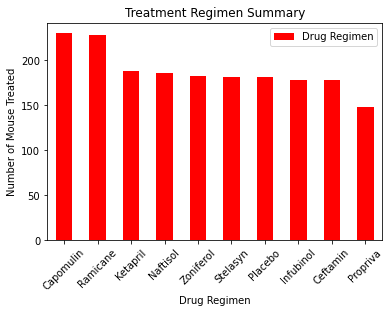

<Figure size 432x288 with 0 Axes>

In [10]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
## Note: this plot will be identical to the one that uses Pyplot
regimen_count_df = pd.DataFrame(cleaned_mouse_data_df["Drug Regimen"].value_counts())
regimen_count_df = regimen_count_df.reset_index(drop=False)
regimen_count_df

multi_plot = regimen_count_df.plot(kind="bar", figsize=(6,4), color='r')
multi_plot.set_xticklabels(regimen_count_df["index"], rotation=45)

plt.title("Treatment Regimen Summary")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Treated")
plt.show()
plt.tight_layout()

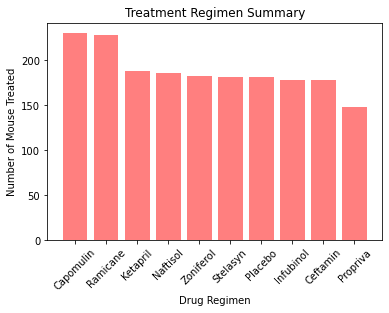

<Figure size 432x288 with 0 Axes>

In [11]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
##  Note: this plot will be identical to the one that uses Pandas
mouse_and_regimen = regimen_count_df[["index","Drug Regimen"]]
x_axis = mouse_and_regimen["index"]
y_axis = mouse_and_regimen["Drug Regimen"]

plt.bar(x_axis, y_axis, color='r', alpha=.5, align="center")
plt.xticks(x_axis, rotation=45)
plt.title("Treatment Regimen Summary")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Treated")

plt.show()
plt.tight_layout()

In [12]:
mouse_gender_df = pd.DataFrame(cleaned_mouse_data_df[["Mouse ID","Sex"]])
mouse_gender_df = mouse_gender_df.drop_duplicates(keep='last')
mouse_gender_df

gender_data_df = pd.DataFrame(mouse_gender_df["Sex"].value_counts())
gender_data_df = gender_data_df.reset_index(drop=False)
gender_data_df

,index,Sex
0,Male,125
1,Female,123


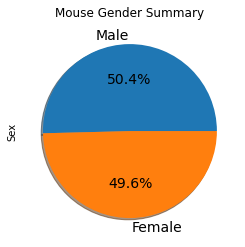

<Figure size 432x288 with 0 Axes>

In [13]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
multi_plot = gender_data_df.plot(kind="pie", y = "Sex", autopct='%1.1f%%', startangle=360, shadow=True,
                                 labels=gender_data_df["index"], legend = False, fontsize=14)

plt.title("Mouse Gender Summary")
#plt.ylabel("")

plt.show()
plt.tight_layout()
## Note: this plot will be identical to the one that uses Pyplot

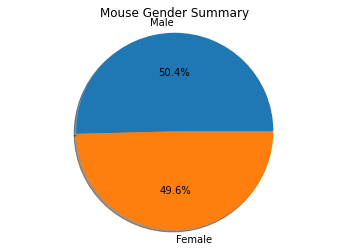

In [14]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
##  Note: this plot will be identical to the one that uses Pandas
gender = gender_data_df["index"]
gender_count = gender_data_df["Sex"]

plt.title("Mouse Gender Summary")

plt.pie(gender_count, labels=gender, autopct="%1.1f%%", shadow=True, startangle=360)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
find_final_tumor_vol_df = cleaned_mouse_data_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
final_tumor_vol_df = find_final_tumor_vol_df.loc[(find_final_tumor_vol_df["Drug Regimen"] == "Capomulin") | 
                                                 (find_final_tumor_vol_df["Drug Regimen"] == "Ramicane")  | 
                                                 (find_final_tumor_vol_df["Drug Regimen"] == "Infubinol") | 
                                                 (find_final_tumor_vol_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (latest) timepoint for each mouse
mouse_and_drug_group = final_tumor_vol_df.groupby(["Mouse ID","Drug Regimen"])
mouse_and_drug_group_df = pd.DataFrame(mouse_and_drug_group["Timepoint"].max())
mouse_and_drug_group_df["Timepoint"].tail(50)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_max_timepoint = pd.merge(mouse_and_drug_group_df,find_final_tumor_vol_df, on=["Mouse ID","Drug Regimen","Timepoint"],how="inner")
mouse_max_timepoint

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [16]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    current_drug_df = mouse_max_timepoint.loc[mouse_max_timepoint["Drug Regimen"] == drug]
    # add subset 
    tumor_vol_data[drug] = current_drug_df["Tumor Volume (mm3)"]
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#    fig1, ax1 = plt.subplots()
#    ax1.boxplot(tumor_vol_data[drug])
#    ax1.set_title('Pymaceuticals Inc. Anti-Cancer Animal Study')
#    ax1.set_ylabel('Tumor Volume (mm3)')
#tumor_vol_data

In [18]:
tumor_vol_data

{'Capomulin': 9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 'Ramicane': 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 'Infubinol': 0     67.973419
 1     65

In [24]:
tumor_vol_data.keys()

dict_keys(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

In [27]:
data_array = []
for key in tumor_vol_data.keys():
    print(key)
    print(tumor_vol_data.keys())
    print(tumor_vol_data[key])
    

Capomulin
dict_keys(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane
dict_keys(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volu

In [28]:
type(data_array)

dict

{'whiskers': [<matplotlib.lines.Line2D at 0x27c1ee4f7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27c1ee4fef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c1ee4f4e0>,
 'medians': [<matplotlib.lines.Line2D at 0x27c1ee5d630>,
 'fliers': [<matplotlib.lines.Line2D at 0x27c1ee5d9b0>,
 'means': []}

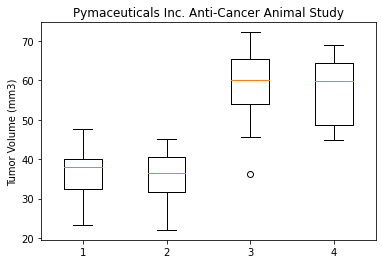

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#data_array = [tumor_vol_data['Capomulin'],tumor_vol_data['Ramicane'],tumor_vol_data['Infubinol'],tumor_vol_data['Ceftamin']]
data_array = []
for key in tumor_vol_data.keys():
    data_array.append(tumor_vol_data[key])
fig1, ax1 = plt.subplots()
ax1.set_title('Pymaceuticals Inc. Anti-Cancer Animal Study')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data_array)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
cleaned_mouse_data_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
Capomulin_data_df = cleaned_mouse_data_df.loc[cleaned_mouse_data_df["Drug Regimen"] == "Capomulin", ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
single_mouse_Capomulin = Capomulin_data_df.loc[Capomulin_data_df["Mouse ID"] == "l509"]

x_axis = single_mouse_Capomulin["Timepoint"]
y_axis = single_mouse_Capomulin["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment of Mouse ID l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(x_axis, y_axis, color="blue", linewidth=1)
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
get_average_volume = Capomulin_data_df.groupby(["Mouse ID"])
average_volume_df = pd.DataFrame(get_average_volume["Tumor Volume (mm3)"].mean())
average_volume_df

volume_vs_weight_df = Capomulin_data_df[["Mouse ID", "Tumor Volume (mm3)"]]
Capomulin_volume_vs_weight_df = pd.merge(average_volume_df, mouse_metadata_df[["Mouse ID", "Weight (g)"]], on ="Mouse ID")
Capomulin_volume_vs_weight_df

x_axis = Capomulin_volume_vs_weight_df["Weight (g)"]
y_axis = Capomulin_volume_vs_weight_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", s=x_axis, alpha=0.75)

plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
correlation = st.pearsonr(x_axis, y_axis)
correlation

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (5,10), fontsize=15, color="blue")

plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()